In [51]:
import pandas as pd
import glob
import re
import os
import shutil

impacts = []
os.makedirs(dest_folder, exist_ok=True)
df = pd.read_csv('./extracted_med_papers.csv')
df.set_index('AccessionID', inplace=True)
print(df.columns)
for f in glob.glob('./papers/all/*.txt'):
    result = re.split(r"[./]+", f)
    aid = result[3]
    impact = df.loc[aid, 'JIF']
    impacts.append(impact)
    
    #if impact < 10:
        #shutil.move(f, os.path.join(dest_folder, os.path.basename(f)))


Index(['JournalID', 'JIF'], dtype='object')


In [52]:
impacts.sort()

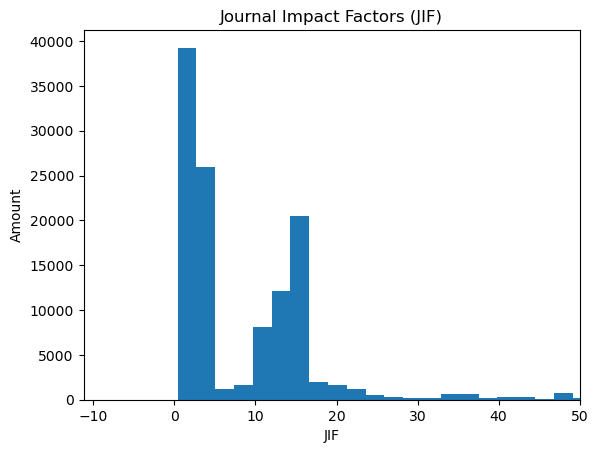

In [64]:
import matplotlib.pyplot as plt

plt.hist(impacts,bins=100)
plt.xlim(right=50)
plt.title("Journal Impact Factors (JIF)")
plt.xlabel("JIF")
plt.ylabel("Amount")
plt.savefig("JIF_histogram_50.png")
plt.show()

In [66]:
len(impacts), sum(impacts)/len(impacts), min(impacts), max(impacts), impacts[len(impacts)//2]

(118562,
 np.float64(8.700096152217121),
 np.float64(0.4),
 np.float64(232.4),
 np.float64(3.3))

In [30]:
import os
import random
import shutil

def copy_random_files(src_dir, dest_dir, n=10000):
    # Make destination directory if missing
    os.makedirs(dest_dir, exist_ok=True)

    # List files in source directory (full paths)
    files = [
        os.path.join(src_dir, f)
        for f in os.listdir(src_dir)
        if os.path.isfile(os.path.join(src_dir, f))
    ]

    # Pick up to n random files
    sample_size = min(n, len(files))
    chosen = random.sample(files, sample_size)

    # Copy them
    for f in chosen:
        shutil.copy(f, dest_dir)

    print(f"Copied {sample_size} files from {src_dir} → {dest_dir}")

In [31]:
copy_random_files("./papers/10_or_more", "./papers/10_or_more_10000", 10000)
copy_random_files("./papers/less_than_10", "./papers/less_than_10_10000", 10000)

Copied 10000 files from ./papers/10_or_more → ./papers/10_or_more_10000
Copied 10000 files from ./papers/less_than_10 → ./papers/less_than_10_10000
